## Problem 1   
Consider a table with 3 columns and 1000 rows, some of whose entries are
missing. Denote by $A$ the set of rows with an entry in the first
column, $B$ the set of rows with an entry in the second column, and $C$
the set of rows with an entry in the third column. Use set notation
(intersections, unions, and complements) to represent the following sets
in terms of $A$, $B$, and $C$.

(i) The set of rows with no missing entries

(ii) The set of rows with all missing entries

(iii) The set of rows with at least one entry present

(iv) The set of rows with an entry in the first column and exactly one
    other entry
    
    

## Solution

(i). Since we need entries in all three columns, we need elements that are in A, B, and C together.

$A \cap B \cap C$

(ii). The set we are looking for ought not to contain any element from set A, set B, or set C.

$A^c \cap B^C \cap C^C$

(iii). We need the set containing (only) those that are fall under A, B, or C.

$A\cup B \cup C$

(iv). We need to select all the elements in A and those columns that are in only one of B and C.

$A \cap ((B \cap C^C)\cup(C \cap B^C))$ 

## Problem 2 

Each of 68 people is interviewed and scored on a scale from 0 to 10
  in three different categories. A composite score is obtained for
  each person by averaging the person's category scores. These data
  are arranged into a $68 \times 4$ matrix $X$, so that each row consists
  of a particular interviewee's category scores and composite score.   
Find the determinant of $X' X$. 

## Solution

It is not hard to show that $X^TX$ has its fourth column being an average of the previous three columns. It follows that the determinant is zero.

Alternatively, we make use of the observation that $X$ and $X^TX$ have the same rank. Since $X$ has rank at most three, it follows that $X^TX$ has rank at most three. This shows that $X^TX$ is rank deficient, or with determinant zero. 

## Problem 3

(a) Does there exist a linearly dependent list of 10 vectors with the property that every sublist of length 9 is linearly independent?

(b) Does there exist a linearly dependent list of 10 vectors with the property that there are exactly 21 ways to remove two vectors from the list to obtain a linearly independent list?

## Solution

a) Yes. Consider a set of ten vectors in which the first nine are linearly indpendent vectors, and the tenth is the sum of the previous nine vectors. This set satisfies the desired property.

b) Yes. Consider a set of ten vectors in which the first eight are linearly independent vectors, the ninth is a sum of the first two vectors, and the tenth a sum of the remaining 8 initial independent vectors. This set satisfies the desired property, for in order to get a linearly independent set we ought to choose one from the first, the second, and the ninth, and we ought to choose one from the remaining, and leaving these vectors out guarantees a linearly independent set.

(For problem b, we arrive at this conclusion mostly through observing the fact that 21 has prime factors 3 and 7, which add up to 10, and we need at least 8 linearly independent vectors. It seems not an unnatural thought to proceed with a linearly dependent vector set of three and another set of seven; an easy approach is to start with 8 linearly independent vectors, pick 2 independent vectors, and add a third linearly dependent on these two; then pick the remaining 6 independent vectors and add a vector linearly dependent on these two.)

## Problem 4: 

A **pangram** is a sentence which contains every letter (they are useful for demonstrating fonts). *The quick brown fox jumps over the lazy dog* is a famous example of a pangram. 

Write a Julia function to check whether a given string is a pangram. 

Hint: you can get the alphabet as a `Set` by doing `Set('a':'z')`. Also, note the characters (single quotes) and strings (double quotes) are different in Julia. 
Code

In [13]:
s1 = "The quick brown fox jumps over the lazy dog"
s2 = "The lazy fox jumps over the big bad dog"

function check_pangram(s)
    s_char_set = collect(s)
    alphabet = Set('a':'z')
    for char in alphabet
        if !(char in s_char_set)
            return false
        end
    end
    return true
end

@assert check_pangram(s1) == true
@assert check_pangram(s2) == false

## Problem 5


In the game of Set, every card has four features:

**Number**. 1, 2, or 3  
**Color**. purple, red, or green  
**Shape**. oval, squiggle, or diamond  
**Shading**. striped, solid, or outline


There is exactly one card for every possible combination of attributes (for example there's exactly one card with 2 red solid squiggles), so there are 81 cards in total. 

Three cards are said to form a set if for each feature, the three cards are either all the same or all different. For example, the cards shown above form a set because their shapes are all different, their shading is all different, the numbers are all different, and the colors are all different. 

The cards are shuffled, and 12 cards are dealt face up for all players to see. If any three of the cards forms a set, then the first player to identify a set gets to pick up those cards, and the cards are replaced from the deck. If no sets are present, then three additional cards are dealt. If a set is identified at 15 cards, then the three removed cards are not replaced, and the count goes back down to 12. If no sets are present even at 15 cards, then three more cards are dealt to get up to 18, and so on. The game ends when the deck is empty and there are no more sets. 

Write a program to simulate this game, play it 10,000 times, and find the proportion of games in which 18 cards appear at some point.

**Hints:**

(1) You can represent cards either as 4-tuples of `Int`s (like (1, 2, 1, 1)) or as a new type.  
(2) It's going to be important to break your program up into small, dedicated functions. For example, you can write a function for returning the 81 total cards, a function for shuffling the deck, a function which takes three cards and returns true or false depending on whether they form a set, a function for dealing cards, a function for finding all the sets on the board, a function which takes a single turn by randomly selecting one of the available sets or adding three cards to the board if there are no sets, and finally a function which puts those functions together to play the game.  
(3) Some Julia tips: 
  - `randperm` generates random permutations, and you can index an array with the resulting list to shuffle it. 
  - `vcat` concatenates two arrays.
  - You probably want to use a four-dimensional array comprehension to generate the list of all cards, and you can index it with a colon to flatten it.
  - To remove elements at positions `i`, `j`, and `k` from an array `A`, you can do `A[setdiff(1:end, (i,j,k))]`
  - You can start with an empty array and grow it one element at a time inside a loop using this pattern:
    ```julia 
    A = []
    for x in 1:10
        push!(A, x)
    end
    ```
  - You can use nested `for` loops to check all the triples to look for a set. There are more efficient algorithms, but that's OK.

#### Mick's Solution: 

In [17]:
function initialize_cards()
   points = [(i, j, k, l) for i in 1:3 for j in 1:3 for k in 1:3 for l in 1:3]
   return points 
end

using Random               

function new_shuffle(cards)
    # This function is called new_shuffle because I think
    # the function shuffle already exists somewhere in Julia
    return cards[randperm(length(cards))]                       
end

function draw_cards(cards, init = true)
    dealt_cards = []
    if init
        for i in 1:12
            push!(dealt_cards, pop!(cards))
        end
    else
        for i in 1:3
            push!(dealt_cards, pop!(cards))
        end
    end
    return dealt_cards
end

function check_for_set(p1, p2, p3)
   for i in 1:length(p1)
        if !((p1[i] == p2[i] && p1[i] == p3[i]) || (p1[i] != p2[i] && p1[i] != p3[i] && p2[i]!= p3[i]))
            return false
        end
    end
    return true
        
end

function search_for_sets(on_table)
    # I am just going to use the computationally
    # most straight forward way
    len = length(on_table)
    for i in 1:len
        for j in i+1:len
            for k in j+1:len
                p1, p2, p3 = on_table[i], on_table[j], on_table[k]
                if check_for_set(p1, p2, p3)
                    return [i, j, k]
                end
            end
        end
    end
    return 0            
end
    

function count_18()
    # Readability of this code is the principal aim
    deck = new_shuffle(initialize_cards())
    on_table = draw_cards(deck)
    counts_18 = 0
    while length(deck) > 0
        if length(on_table) == 18
            counts_18 += 1
        end
        checked_vals = search_for_sets(on_table)
        if !(checked_vals == 0)
            deleteat!(on_table, checked_vals)
            if length(on_table) <= 12
                cards = draw_cards(deck, false)
                for card in cards
                    push!(on_table, card)
                end
            end
        else
            cards = draw_cards(deck, false)
            for card in cards
                push!(on_table, card)
            end
        end
    end
    return counts_18
end


count_18 (generic function with 1 method)

In [18]:
counts = 0
num_rounds = 10000
for i in 1:num_rounds
    counts += count_18()
end
counts/num_rounds

# This number is expected to fluctuate around 0.012-0.018; I have not 
# seen many values deviating from this range.

0.013

### Sam's solution: 

In [19]:
struct Card
    number::Int
    color::Int
    shape::Int
    shading::Int
end

function all_cards()
    [Card(a,b,c,d) for a=1:3,b=1:3,c=1:3,d=1:3][:]
end

function shuffle_deck()
    all_cards()[randperm(81)]
end

function is_set(cards)
    if length(Set([cards[1].number, cards[2].number, cards[3].number])) == 2
        false
    elseif length(Set([cards[1].color, cards[2].color, cards[3].color])) == 2
        false
    elseif length(Set([cards[1].shape, cards[2].shape, cards[3].shape])) == 2
        false
    elseif length(Set([cards[1].shading, cards[2].shading, cards[3].shading])) == 2
        false    
    else
        true
    end
end

function deal_cards(board, deck, n)
    vcat(board,deck[1:n]), deck[n+1:end]
end

function initial_board(deck)
    deal_cards(Card[], deck, 12)
end

function all_sets(board)
    matches = []
    for i in 1:length(board)
        for j in i+1:length(board)
            for k in j+1:length(board)
                if is_set([board[i],board[j],board[k]])
                    matchindices = fill(true, length(board))
                    for idx in (i,j,k)
                        matchindices[idx] = false
                    end
                    push!(matches, matchindices)
                end
            end
        end
    end
    matches
end

function one_turn(board, deck)
    matches = all_sets(board)
    if isempty(matches)
        vcat(board, deck[1:3]), deck[4:end]
    else
        match = rand(matches)
        if length(board) == 12
            vcat(board[match], deck[1:3]), deck[4:end]
        else
            board[match], deck
        end
    end
end

function play_game()
    deck = shuffle_deck()
    board, deck = initial_board(deck)
    board_sizes = []
    while length(deck) > 0
        board, deck = one_turn(board, deck)
        push!(board_sizes, length(board))
    end
    board_sizes
end

play_game (generic function with 1 method)

## Problem 6

Show that if $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$ is linearly
independent and
$\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$ is
linearly dependent, then $\mathbf{w}$ is in the span of
$\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$.

Since $\vec{v_1}, ..., \vec{v_n}$ are linearly independent, and yet the second set is a linearly dependent set, it follows that
$$0 = c_1(\vec{v_1} + \vec{w}) +  c_2\vec{v_2} + ... + c_n \vec{v_n} $$ for some list $\{c_1, c_2, ..., c_n\}$ whose elements are not all equal to zero. If $c_1$ were zero, then the vectors from $\vec{v}_2$ to the end of the list would be linearly dependent. So $c_1 \neq 0$. 

Moving the $\vec{v_1}$ to the left-hand side of the above equation shows that $\vec{w}$ is in the span of $\vec{v_1}, .., \vec{v_n}$.

## Problem 7

Show that if $A$ is a symmetric matrix, then 
$$
A = \lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_n \mathbf{u}_n \mathbf{u}_n'
$$
where $\mathbf{u}_1, \ldots, \mathbf{u}_n$ is a list of linearly independent unit eigenvectors of $A$ and $\lambda_1, \ldots, \lambda_n$ are the corresponding eigenvalues. Does this formula hold if $A$ is diagonalizable but not symmetric?

Hints: start with the orthogonal diagonalization of $A$ and use block multiplication.

The spectral theorem allows us to combine the matrices $V\Lambda$ in the expression $A = V \Lambda V^T$.

First observe that we can write $V = [\vec{v_1}, ..., \vec{v_n}]$, and in this form we see that the product of the first two matrices is $V\Lambda = [\lambda_1 \vec{v_1} , ..., \lambda_n\vec{v_n}]$. 

We then multiply this product with the third matrix. Observing that the rest of the entries match exactly in the sequence of summed entries in the product matrix given by the expression completes the verification.

The second claim need not be true. This can be seen from the following argument: the spectral theorem says that for any symmetric matrix we may decompose it as $A = V\Lambda V^T$, which in turn allows the current decomposed form. Here we rely on the assumption that $V$ is orthogonal; this need not be true of all diagonalizable matrices in general. Consider the example $$A = \begin{bmatrix} 1&2&0\\0&3&0\\2&-4&2 \end{bmatrix}$$ given by Wikipedia as an example of a diagonalizable matrix. It has eigenvectors $[-1, -1, 2] ^T, [0, 0, 1] ^ T,$ and $[-1, 0, 2]^T$, which are not orthogonal vectors and hence do not allow the equivalent expansion of the spectral theorem.



## Problem 8

Use the result of the previous exercise to show that a quadratic function $f:\mathbb{R}^n \to \mathbb{R}$ has a local minimum at a critical point where the eigenvalues of the Hessian of $f$ are all positive.


This is a direct corollary of the spectral theorem.

Let $f: \mathbb{R}^n \to \mathbb{R}$ obtain a critical point at $\vec{a}$ at which $H_f(\vec{a})$ is positive definite--that is, the Hessian matrix evaluated at point $\vec{a}$ have $n$ linearly independent eigenvectors. 

Then we can use a taylor approximation to see the main changes in value in a neighborhood around $\vec{a}$. Suppose that $\vec{x}$ is arbitrarily close to $\vec{a}$. We show that $f(\vec{x}) > f(\vec{a})$ via a two-term Taylor approximation, thereby showing that we have a local minimum at $\vec{v}$.

$$f(\vec{x}) \approx f(\vec{a}) + Df(\vec{a})(\vec{x} - \vec{a}) + \frac 12 (\vec{x} - \vec{a})'H_f(a)(\vec{x} - \vec{a}),$$ 

and since $\vec{a}$ is a critical point, the second term vanishes, giving us 

$$f(\vec{x}) \approx f(\vec{a}) + (\vec{x}-\vec{a})'H(a)(\vec{x}-\vec{a}).
$$


By Spectral Theorem, we can rewrite $(\vec{x}-\vec{a})'H(a)(\vec{x}-\vec{a})$ as $(\vec{x}-\vec{a})'V'\Sigma V(\vec{x}-\vec{a}) $.  By the result of problem 7, we can rewrite $V' \Sigma V$ as $\lambda_1 \vec{v}_1 \vec{v}_1' + \cdots + \lambda_n \vec{v}_n \vec{v}_n'$ where $\vec{v}$ are the eigenvectors of $H$, and we plug in the expansion from problem 8 to obtain

$$f(\vec{x}) \approx f(\vec{a}) + \sum_{i = 1}^n \frac{\lambda_i}{2}[(\vec{x} - \vec{a})' \vec{v_i} ][\vec{v_i}'(\vec{x} - \vec{a})].$$

Observing that the product of the two expressions in square brackets evaluate to a squared norm for each $i$, we have that $f(\vec{x})$ is equal to $f(\vec{a})$ plus a positive number, hence always larger than $f(\vec{a})$, thereby showing the claim.

## Problem 9

Suppose that $A = U \Sigma V'$ where $\Sigma$ is diagonal and $U$ and
$V$ are orthogonal matrices. Show that the columns of $U$ are
eigenvectors of $AA'$ and that the columns of $V$ are eigenvectors of
$A'A$.

Hint: substitute $A = U \Sigma V'$ into the expressions $AA'$ and $A'A$.

This is shown via a quick verification.

$$AA' = U\Sigma V' V \Sigma U' = U\Sigma\Sigma U',$$ and obversing the product of the middle two matrices ought to be diagonal because both are diagonal matrices, we arrive at a diagonalization for $AA'$, and letting $\bar{\Sigma} = \Sigma \Sigma$ as well as noting that $U$ is orthogonal so $U^T = U^{-1}$ gives us

$$ A = U \bar{\Sigma} U^{-1}.$$

We have arrived at a diagonalization of A, thereby showing its eigenvectors are in $U$.

Swapping $U$ and $V$ in the above expression gives a diagonalization of $A'A$ showing $V$ being the matrix composed of eigenvectors of $A'A$
.

#### Alternative explanation by Soryan:

We have $$A A' = U \Sigma V'V \Sigma U' = U \Sigma^2 U'.$$ Multiplying
on the right by $U$, we have that $$A A' U = U \Sigma^2.$$ The $j$th
column on the left is the product of $AA'$ with the $j$th column of $U$,
while the $j$th column on the right is $\sigma_j^2$ times the $j$th
column of $U$, where $\sigma_j$ is the $j$th diagonal entry of $\Sigma$.
Therefore, the $j$th column of $\mathbf{u}$ is an eigenvector of $A$.

Similarly, we have $$A'A = V \Sigma^2 V',$$ and the same argument shows
that the columns of $V$ are all eigenvectors of $A'A$. 

## Problem 10

The singular value decomposition can be used to identify the primary
axes in a ellipsoidal point cloud. Run the following block to generate
and plot a set of 100 points.

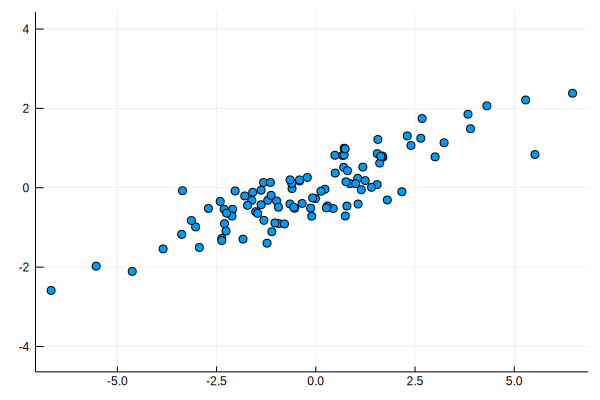

In [20]:
using LinearAlgebra 
using Plots 
using Random; Random.seed!(1234) # to make sure we get the same points
numpoints = 100 
T = [1 2; 0 1]
P = T * randn(2, numpoints)
scatter(P[1,:], P[2,:], aspect_ratio=:equal, legend=false)

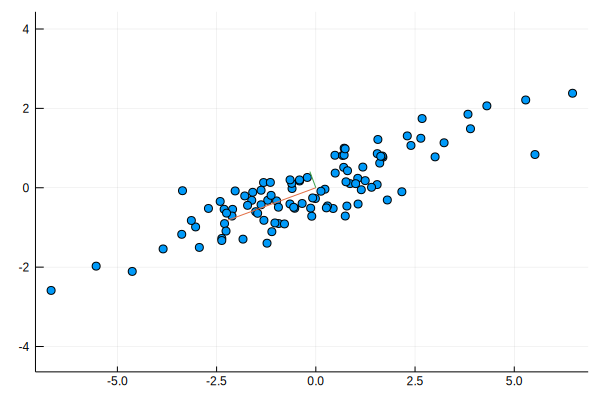

In [21]:
U, Σ, V = svd(P)
plot!([(0,0),(Σ[1]/sqrt(numpoints)*U[1,1],Σ[1]/sqrt(numpoints)*U[2,1])])
plot!([(0,0),(Σ[2]/sqrt(numpoints)*U[1,2],Σ[2]/sqrt(numpoints)*U[2,2])])